# Линейная регрессия и стохастический градиентный спуск

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$.


**Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.**

## Инструкции по выполнению

### Описание данных
В домашней работе вы будете работать с набором данных "advertising". Этот набор данных отражает выручку от продаж,
полученную с учетом затрат на рекламу по нескольким каналам, таким как радио(Radio), телевидение(TV) и газеты(Newspaper).
Ваша задача научиться прогнозировать эту выручку(Sales).

### Задание 1 [3 балла]

**Загрузите данные из файла *advertising.csv* в объект pandas DataFrame.**

In [2]:
import numpy
import pandas
import pandas as pd
advertising_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.** 

In [3]:
# Ваш код здесь
print("HEAD:")
print(advertising_data.head(5), end='\n\n')

HEAD:
      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9



In [4]:
# Ваш код здесь
print("DESCRIPTION")
print(advertising_data.describe())

DESCRIPTION
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


**Создайте матрицу признаков NumPy *X* из столбцов TV, Radio и Newspaper и массив *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
import numpy as np

N = advertising_data.columns.shape[0] - 1
X : np.ndarray = advertising_data.iloc[:, 0:N].to_numpy()
y : np.ndarray = advertising_data['Sales'].to_numpy()

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
means = np.mean(X, axis=0)
stds = X.std(axis=0)
means

array([147.0425,  23.264 ,  30.554 ])

In [7]:
X = (X - means) / stds
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [8]:
shape = X.shape[0]
ones = np.ones(shape=(shape, 1))

X = np.hstack((ones, X))
X

array([[ 1.00000000e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [ 1.00000000e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [ 1.00000000e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [ 1.00000000e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [ 1.00000000e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [ 1.00000000e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [ 1.00000000e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [ 1.00000000e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [ 1.00000000e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [ 1.00000000e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [ 1.00000000e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [ 1.00000000e+00,  7.90028350e-01,  4.96973404e-02,
      

### Задание 2 [3 балла]

**Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.** 

In [9]:
def mserror(y: pd.Series, y_pred: pd.Series) -> float:
    # Ваш код здесь
    err = (1 / y.shape[0]) * np.sum(((y.values - y_pred.values) ** 2))
    return err


**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Округлите ответ до 3 знаков после запятой.**

In [10]:
y_pred = pd.Series(np.repeat(advertising_data['Sales'].median(), shape))
y_real = advertising_data['Sales']

answer1 = round(mserror(y_real, y_pred), 3)
answer1

28.346

### Задание 3 [3 балла]

**Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [11]:
def normal_equation(X: np.ndarray, y: np.ndarray):
    # Ваш код здесь
    inv = np.linalg.inv(np.matmul(X.T, X))
    weights = np.matmul(np.matmul(inv, X.T), y)
    return weights

In [12]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Округлите ответ до 3 знаков после запятой.**

In [15]:
X_average = np.array([1, 0, 0, 0])
y_pred = np.matmul(X_average, norm_eq_weights)
y_pred

14.0225

### Задание 4 [5 баллов]

**Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов.**

In [16]:
def linear_prediction(X, w):
    # Ваш код здесь
    return np.matmul(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат округлите до 3 знаков после запятой.**

In [19]:
answer3 = mserror(pd.Series(linear_prediction(X, norm_eq_weights)), pd.Series(y))
print(round(answer3, 3))

2.784


**Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.** 

In [105]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.1):
    grad = []

    shape_x = X.shape[0]
    shape_y = X.shape[1]

    for i in range(shape_y):

        err = X[train_ind].dot(w) - y[train_ind]

        grad.append(2 / shape_x * X[train_ind, i] * err)

    return  w - eta * np.array(grad)

### Задание 5 [6 баллов]

**Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)

**На каждой итерации в список (errors) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также список (errors) ошибок.**

In [106]:
import random


def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4):
    w = w_init
    errors = []
    shape_y = X.shape[1]
    for i in range(1, int(max_iter)):
        train_ind = random.randint(0, shape_y - 1)
        w = stochastic_gradient_step(X, y, w, train_ind)

        error = mserror(pd.Series(X.dot(w)), pd.Series(y))
        errors.append(error)
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей.**

In [107]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0, 0, 0, 0]).T, max_iter=1e5)

CPU times: user 9.99 s, sys: 44.4 ms, total: 10 s
Wall time: 10.1 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Library/Python/3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0, 0.5, 'MSE')

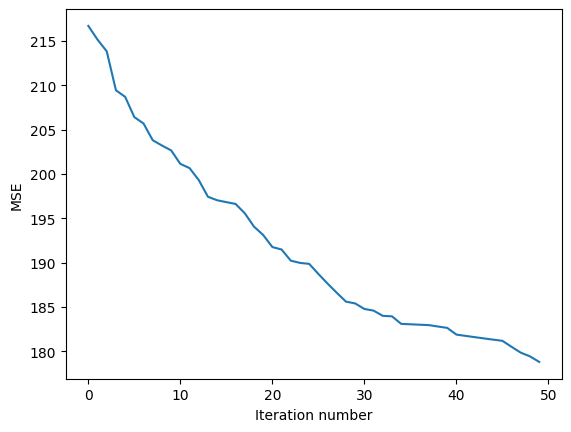

In [82]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Library/Python/3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0, 0.5, 'MSE')

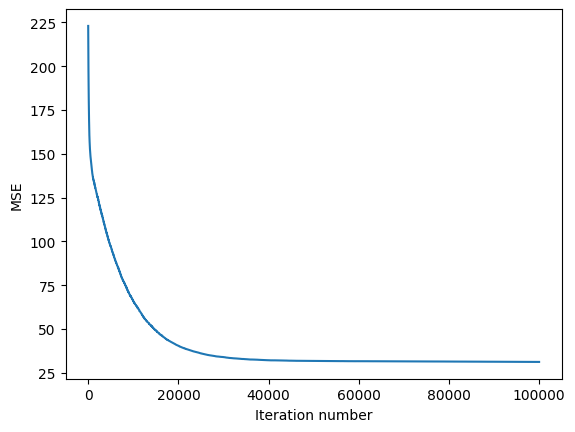

In [108]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [54]:
stoch_grad_desc_weights

array([7.98769283, 5.26713766, 4.39720228, 2.3889241 ])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [61]:
stoch_errors_by_iter[-1]

52.75813850653689

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный ответ округлите до 3 знаков после запятой**

In [109]:
answer4 = mserror(pd.Series(linear_prediction(X, stoch_grad_desc_weights)), pd.Series(y))
print(round(answer4, 3))

31.171
